In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing our manual plotting utils
from utils import *

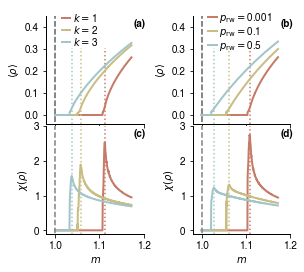

In [26]:
#Path to data
path = "../results/phase-diagram-paper/"
#tf = 5000, trelax=1000, tbetween=100, runs=1000

#Data is partitioned over several files
nparts = 43

#Then get the k
ks = [1,2,3]
L = 128

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=one_col_fig(10), sharex=True)


#Lines go at the maximum variance
maxvar = []


# --- Changing k

for k in ks:
    data = np.empty((0,4))
    for part in range(nparts):
        datafile = np.loadtxt(path + "diagram_k{0}_L{1}_part{2}".format(k, L, part))
        data = np.append(data, datafile, axis=0)
    del datafile

    axes[0,0].plot(data[:,0], data[:,1], label="$k=${0}".format(k), color=cK[k][L],lw=2)
    axes[1,0].plot(data[:,0], L*L*data[:,2], color=cK[k][L],lw=2)
    #maxvar.append(data[np.argmax[data:,2], 0])
    axes[0,0].axvline(data[np.argmax(data[:,2]), 0], ls=":", color=cK[k][L],  ymax=0.7)
    axes[1,0].axvline(data[np.argmax(data[:,2]), 0], ls=":", color=cK[k][L])

#Set y limits
axes[0,0].set_ylim(-0.04,0.45)
axes[1,0].set_ylim(-0.1,3)

#Plot a vertical line for MF, also set xlimits
for ax in axes[0,:]:
    ax.set_xlim(0.98, 1.2)
    ax.plot((1, 1), (-1,100), ls="--", color=cBP)

#Set legend    
axes[0,0].legend(loc=(0.12,0.67), frameon = False, handletextpad= hPad/2, handlelength = hL/2, labelspacing=0.0)

# --- Quasicritical case

#Path to data
path = "../results/phase-diagram-reshuffling/"

#Then get the p
ps = [0.001, 0.1, 0.5]
L = 128

for k,p in enumerate(ps):
    data = np.empty((0,4))
    for part in range(nparts):
        datafile = np.loadtxt(path + "diagram_p{0:.3f}_L{1}_part{2}".format(p, L, part))
        data = np.append(data, datafile, axis=0)
    del datafile

    axes[0,1].plot(data[:,0], data[:,1], label=r"$p_\mathrm{rw}=$" + "{0}".format(p), color=cK[k+1][L], lw=2)
    axes[1,1].plot(data[:,0], L*L*data[:,2], color=cK[k+1][L], lw=2)
    axes[0,1].axvline(data[np.argmax(data[:,2]), 0], ls=":", color=cK[k+1][L], ymax=0.7)
    axes[1,1].axvline(data[np.argmax(data[:,2]), 0], ls=":", color=cK[k+1][L])
    
#Set y limits
axes[0,1].set_ylim(-0.04,0.45)
axes[1,1].set_ylim(-0.1,3)


#Set legend    
axes[0,1].legend(loc=(0.12,0.62), frameon = False, handletextpad=hPad/2, handlelength = hL/2, labelspacing=0.0)

    
# --- For all diagrams    
#Labels
for ax in axes[0,:]:
    ax.set_ylabel(r"$\langle \rho \rangle$")
for ax in axes[1,:]:
    ax.set_ylabel(r"$\chi(\rho)$")
for ax in axes[1,:]:
    ax.set_xlabel(r"$m$")

#Leave just the axes
despine(axes)
    
#Plot a vertical line for MF, also set xlimits
for ax in axes.ravel():
    ax.set_xlim(0.98, 1.2)
    ax.plot((1, 1), (-1,100), ls="--", color=cBP)

label_axes(axes, (0.9,0.9))
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.02)
plt.savefig('fig2_phase_diagram.pdf',bbox_inches='tight')
plt.show()